In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import GRU,LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='Colombia']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
9702,2020-03-05,NaN
9703,2020-03-06,NaN
9704,2020-03-07,1.0
9705,2020-03-08,NaN
9706,2020-03-09,NaN
...,...,...
9920,2020-10-09,8496.0
9921,2020-10-10,8121.0
9922,2020-10-11,8447.0
9923,2020-10-12,8569.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


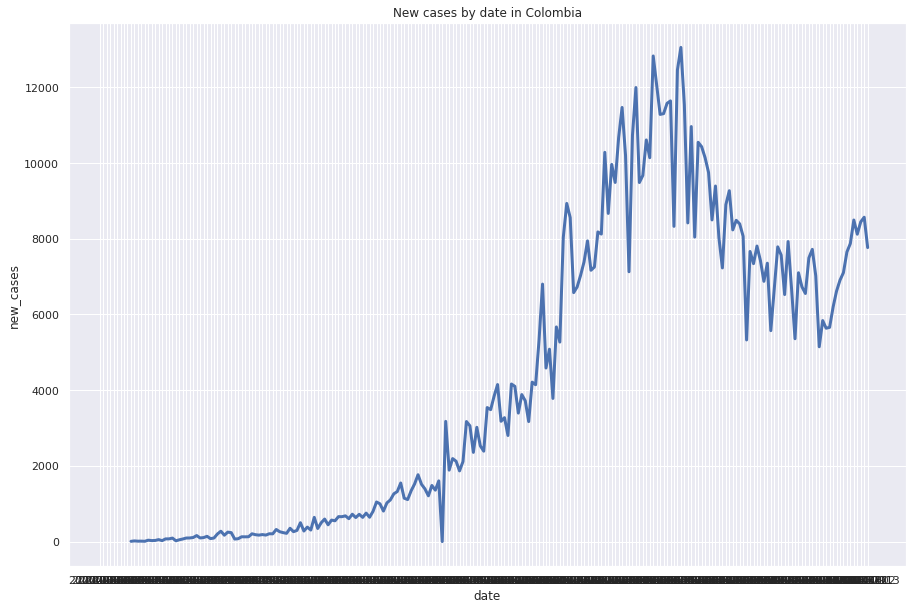

In [5]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Colombia')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()



# **Data Preprocessing:**

In [6]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [7]:
case_series=case_series.fillna(0)
case_series

,new_cases
9702,0.0
9703,0.0
9704,1.0
9705,0.0
9706,0.0
...,...
9920,8496.0
9921,8121.0
9922,8447.0
9923,8569.0


In [8]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
timestep=6
X_case, y_case = create_dataset(case_series, timestep)


In [10]:
train_size=int(len(case_series)*0.95)

In [11]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [12]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [13]:

model = Sequential()
model.add((GRU(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((GRU(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
7/7 - 0s - loss: 28458800.0000
Epoch 2/600
7/7 - 0s - loss: 26131266.0000
Epoch 3/600
7/7 - 0s - loss: 23681836.0000
Epoch 4/600
7/7 - 0s - loss: 21507296.0000
Epoch 5/600
7/7 - 0s - loss: 18506368.0000
Epoch 6/600
7/7 - 0s - loss: 14725427.0000
Epoch 7/600
7/7 - 0s - loss: 10190647.0000
Epoch 8/600
7/7 - 0s - loss: 4508560.0000
Epoch 9/600
7/7 - 0s - loss: 1328211.3750
Epoch 10/600
7/7 - 0s - loss: 1123912.7500
Epoch 11/600
7/7 - 0s - loss: 782641.8750
Epoch 12/600
7/7 - 0s - loss: 798977.8125
Epoch 13/600
7/7 - 0s - loss: 764565.2500
Epoch 14/600
7/7 - 0s - loss: 1154993.6250
Epoch 15/600
7/7 - 0s - loss: 823843.6875
Epoch 16/600
7/7 - 0s - loss: 797381.4375
Epoch 17/600
7/7 - 0s - loss: 805445.9375
Epoch 18/600
7/7 - 0s - loss: 850819.4375
Epoch 19/600
7/7 - 0s - loss: 782509.1250
Epoch 20/600
7/7 - 0s - loss: 760636.4375
Epoch 21/600
7/7 - 0s - loss: 773799.5625
Epoch 22/600
7/7 - 0s - loss: 774077.0625
Epoch 23/600
7/7 - 0s - loss: 795128.4375
Epoch 24/600
7/7 - 0s - l

# **Check validation data:**

In [14]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [15]:
x_input

array([7787., 7568., 6526., 7927., 6678., 5359.], dtype=float32)

In [16]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[7169.841]
1 day input [7568.    6526.    7927.    6678.    5359.    7169.841]
[7568.    6526.    7927.    6678.    5359.    7169.841]
[[[7568.   ]
  [6526.   ]
  [7927.   ]
  [6678.   ]
  [5359.   ]
  [7169.841]]]
1 day output [[7405.163]]
2 day input [6526.    7927.    6678.    5359.    7169.841 7405.163]
[6526.    7927.    6678.    5359.    7169.841 7405.163]
[[[6526.   ]
  [7927.   ]
  [6678.   ]
  [5359.   ]
  [7169.841]
  [7405.163]]]
2 day output [[6888.182]]
3 day input [7927.    6678.    5359.    7169.841 7405.163 6888.182]
[7927.    6678.    5359.    7169.841 7405.163 6888.182]
[[[7927.   ]
  [6678.   ]
  [5359.   ]
  [7169.841]
  [7405.163]
  [6888.182]]]
3 day output [[6738.8174]]
4 day input [6678.     5359.     7169.841  7405.163  6888.182  6738.8174]
[6678.     5359.     7169.841  7405.163  6888.182  6738.8174]
[[[6678.    ]
  [5359.    ]
  [7169.841 ]
  [7405.163 ]
  [6888.182 ]
  [6738.8174]]]
4 day output [[6756.4663]]
5 day input [5359.     7169.841  7405.163  6888.1

In [17]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [18]:
lst_output=numpy.array(lst_output)
lst_output

array([7169.841 , 7405.163 , 6888.182 , 6738.8174, 6756.4663, 6381.097 ,
       6293.678 , 6260.0728, 6139.048 , 5985.6953, 5903.7896, 5751.391 ],
      dtype=float32)

No handles with labels found to put in legend.


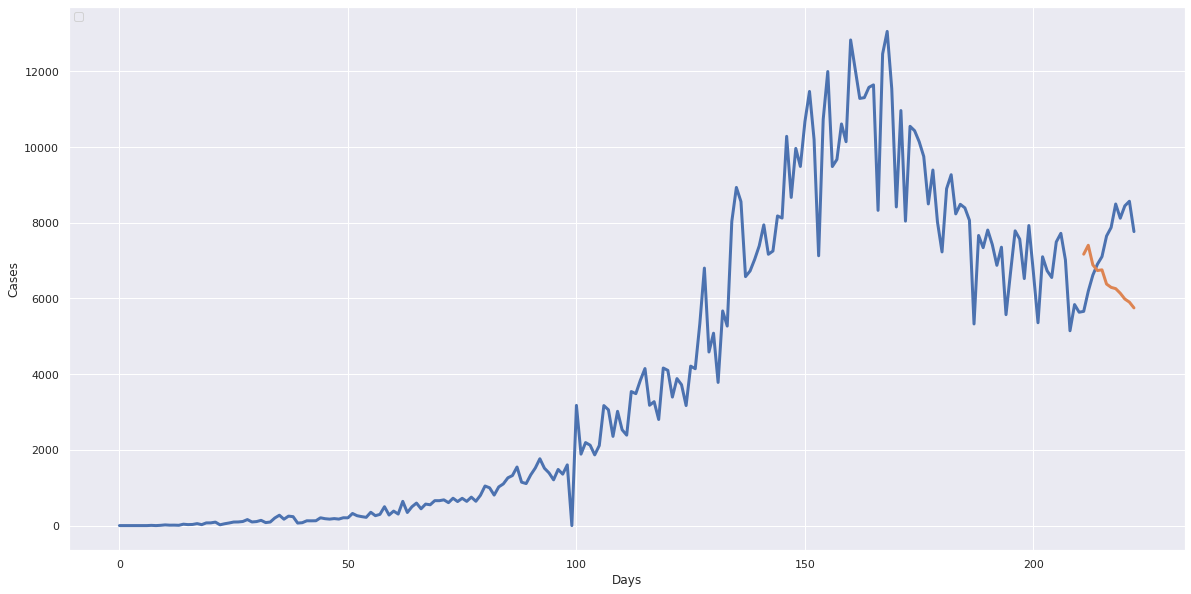

In [19]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [20]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [21]:

x_input

array([7875., 8496., 8121., 8447., 8569., 7767.], dtype=float32)

In [22]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[7581.949]
1 day input [8496.    8121.    8447.    8569.    7767.    7581.949]
[8496.    8121.    8447.    8569.    7767.    7581.949]
[[[8496.   ]
  [8121.   ]
  [8447.   ]
  [8569.   ]
  [7767.   ]
  [7581.949]]]
1 day output [[7522.1294]]
2 day input [8121.     8447.     8569.     7767.     7581.949  7522.1294]
[8121.     8447.     8569.     7767.     7581.949  7522.1294]
[[[8121.    ]
  [8447.    ]
  [8569.    ]
  [7767.    ]
  [7581.949 ]
  [7522.1294]]]
2 day output [[7358.9395]]
3 day input [8447.     8569.     7767.     7581.949  7522.1294 7358.9395]
[8447.     8569.     7767.     7581.949  7522.1294 7358.9395]
[[[8447.    ]
  [8569.    ]
  [7767.    ]
  [7581.949 ]
  [7522.1294]
  [7358.9395]]]
3 day output [[7250.8667]]
4 day input [8569.     7767.     7581.949  7522.1294 7358.9395 7250.8667]
[8569.     7767.     7581.949  7522.1294 7358.9395 7250.8667]
[[[8569.    ]
  [7767.    ]
  [7581.949 ]
  [7522.1294]
  [7358.9395]
  [7250.8667]]]
4 day output [[7230.0684]]
5 day input

In [23]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


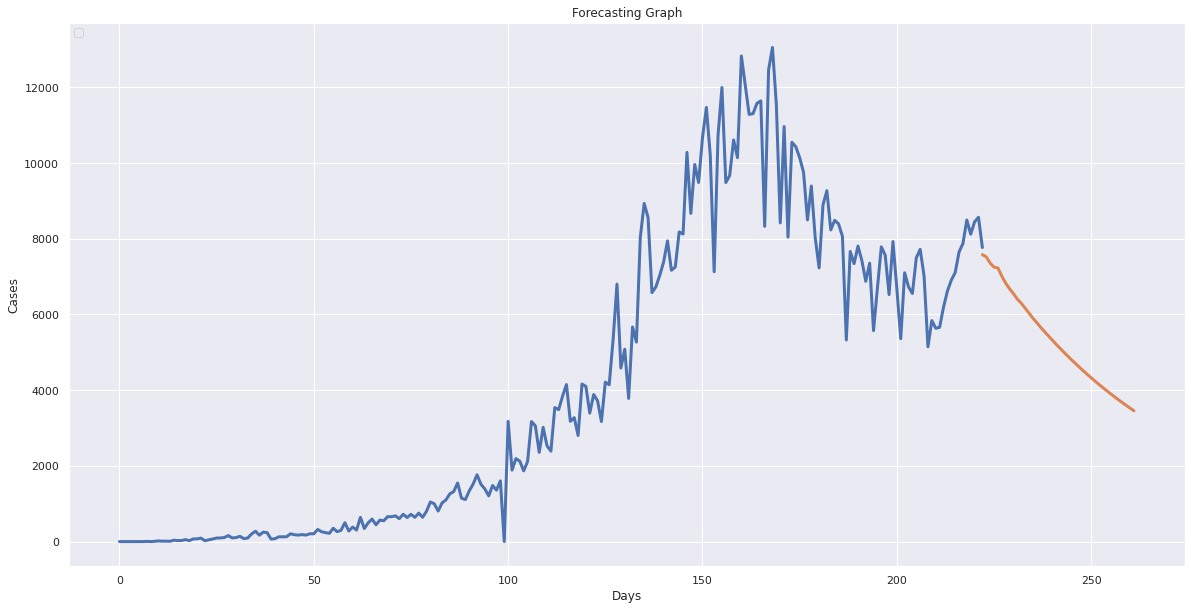

In [24]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()